Task 1 (2p.): Compare at least 3 different community detection algorithms for 2 different datasets (graphs).
Compute the partitions and compare their modularity.

In [27]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from networkx.algorithms.community.centrality import girvan_newman
import itertools

%matplotlib inline

## Loading congress twitter data

In [23]:
congress = pd.read_csv(
    'congress.edgelist',
    delimiter=' ',
    names=['source', 'target'],
    usecols=[0, 1]  # specify the columns to read
)

In [3]:
G = nx.from_pandas_edgelist(congress, 'source', 'target')

In [30]:
num_nodes = G.number_of_nodes()

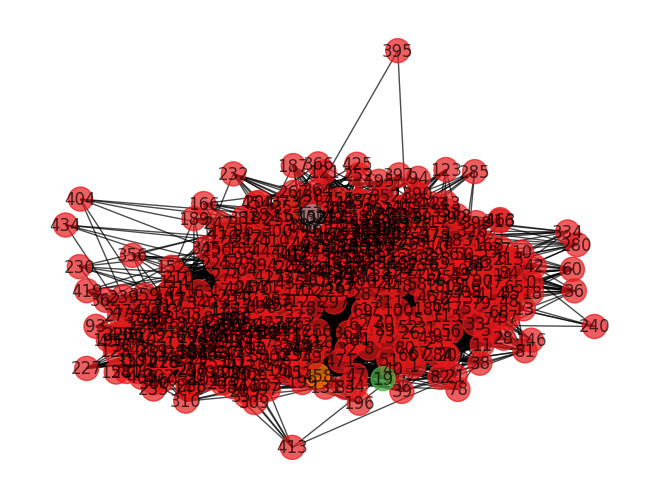

In [31]:
communities = girvan_newman(G)

k = 3 # Step of Girvan Newman algorithm

communities = [list(community) for community in next(itertools.islice(communities, k, None))]
colors = {node: i for i, nodes in enumerate(communities) for node in nodes}
colors = [colors[i] for i in range(num_nodes)]

layout = nx.spring_layout(G, seed=4)
nx.draw(G, layout, cmap = plt.cm.Set1, node_color=colors, with_labels=True, node_size=300, alpha=0.7)

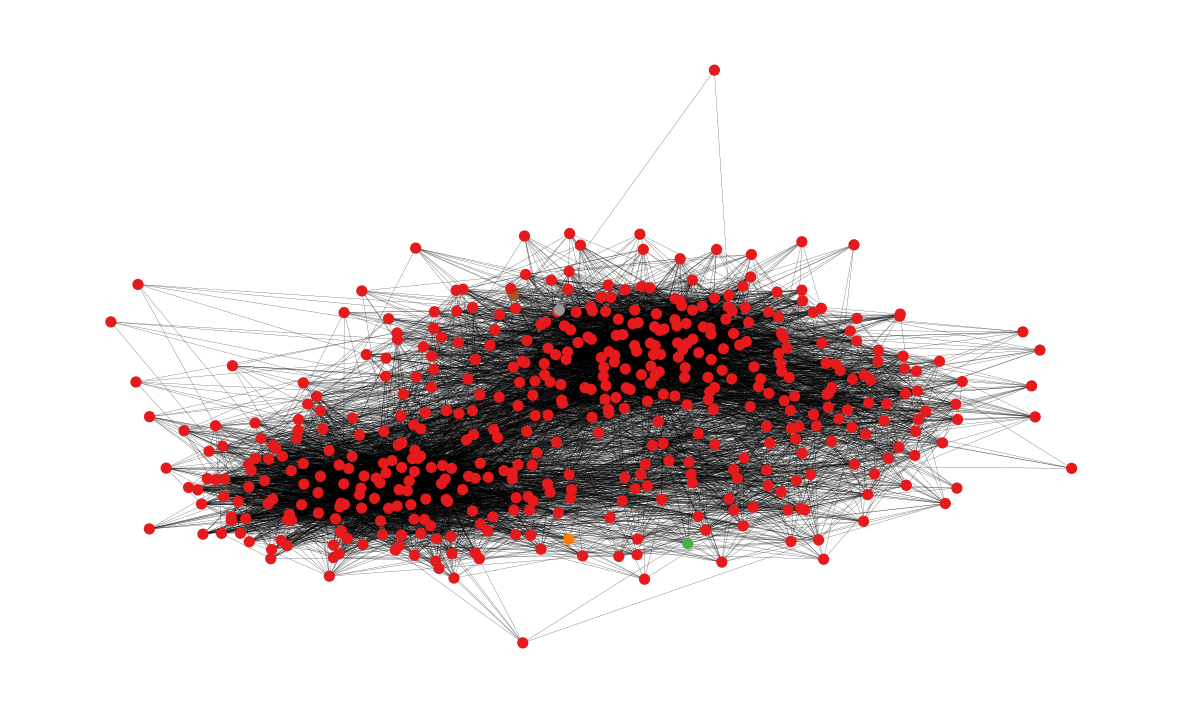

In [40]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 50, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=layout, cmap = plt.cm.Set1, node_color=colors, **plot_options)


## Visualizing the network

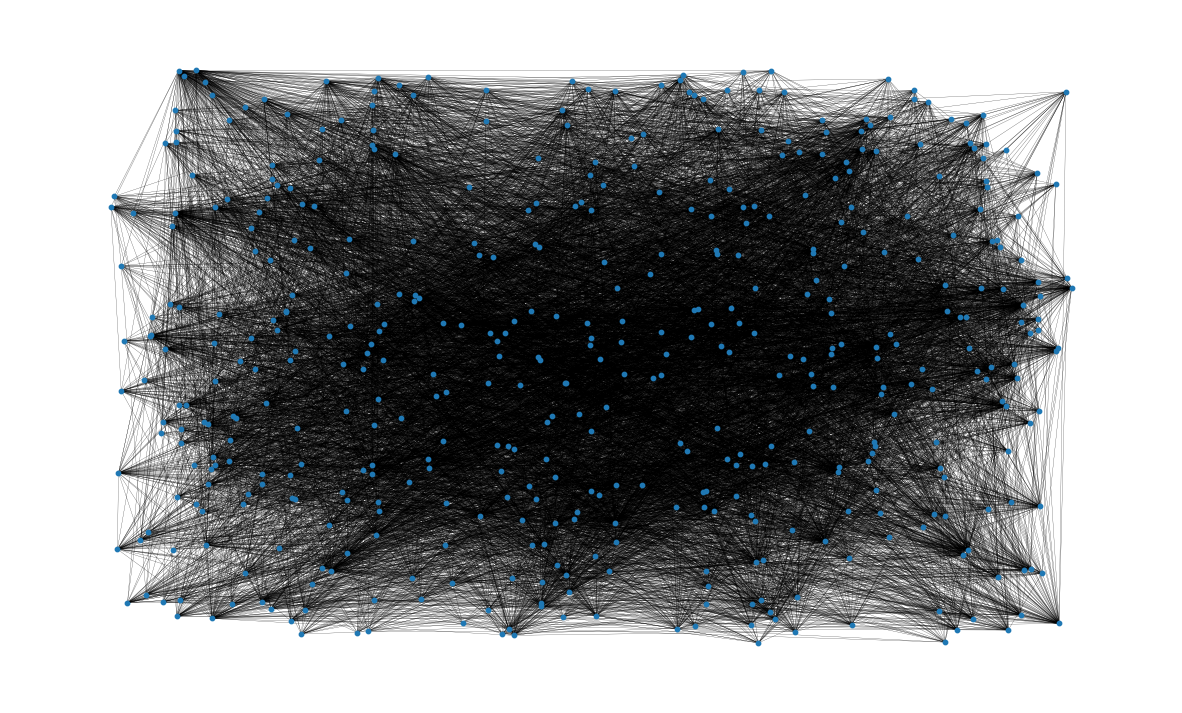

In [4]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

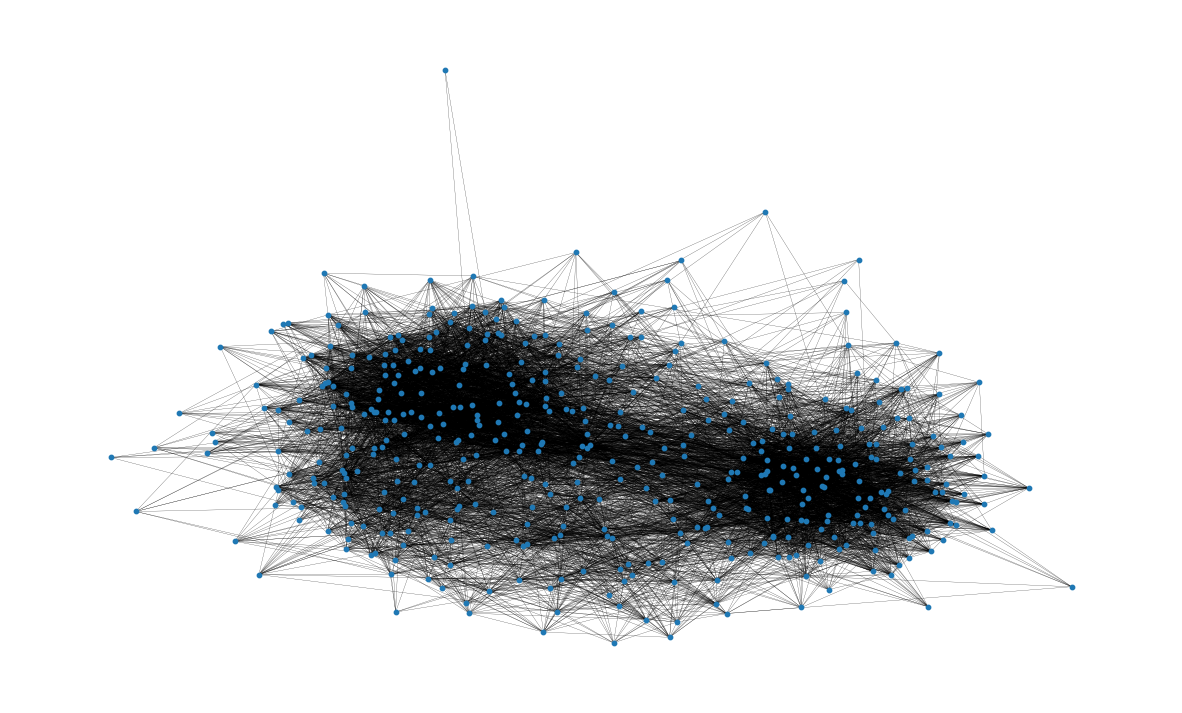

In [5]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)